# Import packages
* Import the following packages which required for data processing and building tha model

In [22]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

## Create Category's
Create 2 category's for binary classification

In [24]:
class_names = ['men', 'women']
class_names_label = {'men': 0,
                    'women' : 1
                    }
nb_classes = 2

In [25]:
size = (200,200)
output = []
directory = "../input/data-gender/Training Set"

# Data Preprocessong
Load all the training images and convert it into numbers

In [26]:
images = []
labels = []
for folder in os.listdir(directory):
    
    curr_label = class_names_label[folder]
    for file in os.listdir(directory + "/" + folder):
        img_path = directory + "/" + folder + "/" + file
        if not file.endswith('gif'): 
            curr_img = cv2.imread(img_path)
            curr_img = cv2.resize(curr_img, size)
        else:
            curr_img = load_img(img_path, target_size=size)
            curr_img = img_to_array(curr_img)
        images.append(curr_img)
        labels.append(curr_label)
images, labels = shuffle(images, labels)     ### Shuffle the data !!!
images = np.array(images, dtype = 'float32') ### Our images
labels = np.array(labels, dtype = 'int32').reshape(-1,1)   ### From 0 to num_classes-1!

# Normalize the data
Scale the data set

In [28]:
images = np.array(images) / 255.0

# Create CV dataset

In [29]:
(trainX, testX, trainY, testY) = train_test_split(images, labels, test_size=0.2, random_state=50)

In [30]:
trainX.shape

(2112, 200, 200, 3)

In [32]:
trainY.shape

(2112, 1)

In [35]:
print ("Number of training examples: " + str(trainX.shape[0]))
print ("Number of testing examples: " + str(testX.shape[0]))
print ("Each image is of size: " + str(trainX.shape[1:]))

Number of training examples: 2112
Number of testing examples: 528
Each image is of size: (200, 200, 3)


# Train the model
Tried with different combinations of hyper paramters and selected the following parameters which gives better prediction result and avoids the overfitting problem

In [36]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape = [200, 200, 3]))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 64)       

In [38]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# Data Augmentaion
Applied data generator to generate diversed images from the existing images such cropped, padding and horizantol flipping. Tried with the different combinitions and selected the best values based on the accuracy

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True
    )

In [ ]:
#history = model.fit(trainX, trainY, batch_size=32, epochs=50, validation_data=(testX, testY))

# Train the model

In [44]:
history = model.fit_generator(
            train_datagen.flow(trainX, trainY, batch_size=32), 
            epochs=50, 
            validation_data=(testX, testY)
          )

Epoch 1/50
66/66 [==============================] - 18s 272ms/step - loss: 0.7602 - accuracy: 0.6151 - val_loss: 0.6694 - val_accuracy: 0.5833
Epoch 2/50
66/66 [==============================] - 19s 294ms/step - loss: 0.6367 - accuracy: 0.6420 - val_loss: 0.6321 - val_accuracy: 0.6477
Epoch 3/50
66/66 [==============================] - 19s 284ms/step - loss: 0.6220 - accuracy: 0.6709 - val_loss: 0.6147 - val_accuracy: 0.6686
Epoch 4/50
66/66 [==============================] - 19s 288ms/step - loss: 0.5992 - accuracy: 0.6780 - val_loss: 0.6188 - val_accuracy: 0.6591
Epoch 5/50
66/66 [==============================] - 19s 289ms/step - loss: 0.6057 - accuracy: 0.6771 - val_loss: 0.5930 - val_accuracy: 0.6496
Epoch 6/50
66/66 [==============================] - 19s 287ms/step - loss: 0.5697 - accuracy: 0.7041 - val_loss: 0.5776 - val_accuracy: 0.7064
Epoch 7/50
66/66 [==============================] - 19s 284ms/step - loss: 0.5515 - accuracy: 0.7254 - val_loss: 0.5482 - val_accuracy: 0.7121

# Visualize accuracy over different epochs
As per the validation accuracy there is no overfitting however the validation loss is little more when epoch approaches 100

<Figure size 432x288 with 0 Axes>

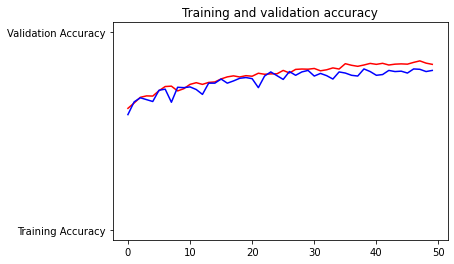

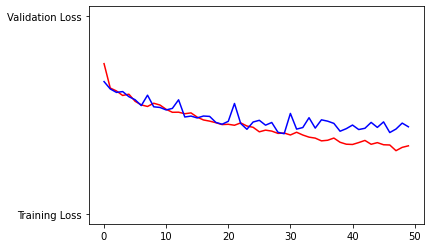

<Figure size 432x288 with 0 Axes>

In [48]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()